## Add guassian noise to preprocessed images
### import modules

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import cv2

In [53]:
image_path = 'Processed Images/test.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

### Guassian Noise

In [108]:
# add gaussian noise to image
def add_gaussian_noise(image):
    row, col = image.shape
    mean = 0
    std = 1 # vary this value to increase or decrease noise
    noise = np.random.normal(mean, std, (row, col)).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

(np.float64(-0.5), np.float64(1327.5), np.float64(965.5), np.float64(-0.5))

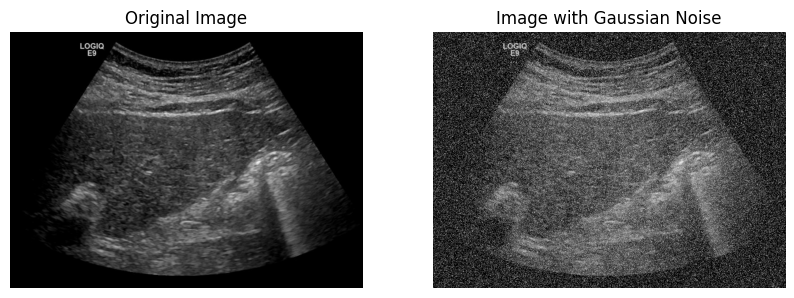

In [109]:
noisy_image = add_gaussian_noise(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Image with Gaussian Noise")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

### Speckle Noise
More specific to imaging noise prevalent in medical applications

In [110]:
# add salt and pepper noise to image
def add_speckle_noise(image):
    row, col = image.shape
    noise = np.random.rayleigh(1, (row, col)).astype(np.uint8)
    noisy_image = image + image * noise
    return noisy_image

(np.float64(-0.5), np.float64(1327.5), np.float64(965.5), np.float64(-0.5))

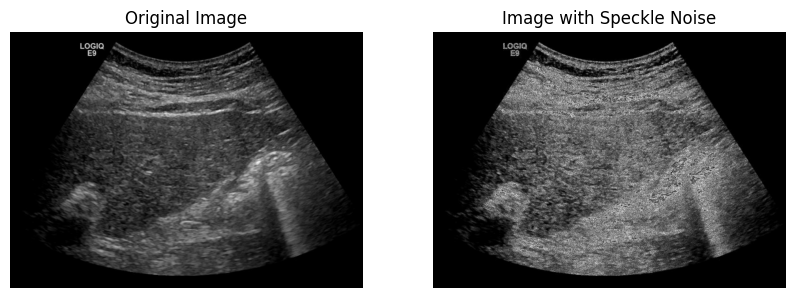

In [111]:
noisy_image = add_speckle_noise(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Image with Speckle Noise")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

### Write noisy images to new directory

In [113]:
import os

# Iterate through all images in the "Processed Images" folder
processed_images_dir = 'Processed Images'
for filename in os.listdir(processed_images_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(processed_images_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Apply speckle noise
        noisy_image = add_speckle_noise(image)
        
        # Save the noisy image to the "Noisy Images" folder
        noisy_images_dir = 'Noisy Images'
        new_filename = filename + '_speckle_noise.png'
        noisy_image_path = os.path.join(noisy_images_dir, new_filename)

        if not os.path.exists(noisy_image_path):
            cv2.imwrite(noisy_image_path, noisy_image)